<a class="anchor" id="top-of-doc"></a>
## Table Of Contents: 
* [Prep](#prep)
* [Metrics 1](#metrics1)
* [Metrics 2](#metrics2)
* [Metrics 3](#metrics3)
* [Output file](#outfile)

<div class="span5 alert alert-info">
<B>  Prep: </B> <a class="anchor" id="prep"></a>   
</div>

<div class="span5 alert alert-success">
<I> About prep: </I> This is preparation to use the City Finances data to generate metrics
</div>

In [1]:
#Directory path
%cd C:\Users\user\Documents\00_Applications_DataScience\00_After_Springboard\City_Finances\Data

C:\Users\user\Documents\00_Applications_DataScience\00_After_Springboard\City_Finances\Data


In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Set option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#Import the cleaned dataset
data_in = pd.read_csv('02_fisc_cleaned_data.csv')

data_in.head(2)

,year,city_name,city_population,cpi,rev_total,rev_general,intergovt_rev,igr_federal,igr_state,own_source_rev,taxes,tax_property,tax_sales_grossrec,tax_sales_general,tax_sales_selectiv,tax_sales_motofuel,tax_sales_alcohol,tax_sales_tobacco,tax_sales_utility,tax_sales_other,tax_income_indiv,tax_income_corp,tax_motor_vehicle,tax_other,charges_misc_rev,charges,chg_educ,chg_higher_ed,chg_school_lunch,chg_hospitals,chg_highways,chg_air_transit,chg_parking,chg_seaport,chg_nat_resources,chg_parks_rec,chg_hous_commdev,chg_sewers,chg_waste_mgmt,chg_other,misc_general_rev,misc_interest,misc_fines_fees,misc_spec_assess,misc_property_sale,misc_other,rev_utility,rev_utility_water,rev_utility_elec,rev_utility_gas,rev_utility_transit,rev_liquor_store,rev_empl_retire_tr,spending_direct,spending_general,education_services,education,educ_higher,educ_elem_sec,libraries,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,hospitals,health,transportation,highways,air_transit,parking,seaport,public_safety,police,fire,correction,inspection,envir_housing,natural_resources,parks_recreation,housing_commdevt,sewerage,waste_mgmt,administration,admin_financial,admin_judicial,public_buildings,admin_other,interest_general,misc,commercial_activ,other_gen_spending,spending_utility,utility_water,utility_elec,utility_gas,utility_transit,spend_liquor_store,sp_empl_retire_tr,spending_total,spend_intergovt,spend_current_ops,spend_capital,capital_construct,capital_other_dir,spend_assistance,spend_debtinterest,spend_insurance,salaries_wages,capital_general,capital_education,capital_higher_ed,capital_elem_ed,capital_hospitals,capital_highways,capital_correction,capital_nat_res,capital_parks_rec,capital_sewers,capital_waste_mgmt,capital_other_gen,capital_utility,debt_outstanding,debt_short_term,debt_long_term,debt_private_purp,debt_issued,debt_retired,cash_holdings,cash_empl_retire,cash_other,cash_other_offsets,cash_other_bonds,cash_other_other,enrollment,state,latitude,longitude
0,2002,Anchorage,264274,1.334113,4812.12,4334.03,2001.34,146.77,1854.57,2332.69,1624.65,1453.46,99.60,0.0,99.60,0.0,0.0,24.04,0.0,75.56,0.0,0.0,25.28,46.31,708.04,404.28,56.45,0.0,26.91,0.0,0.32,4.85,21.34,43.92,0.0,8.71,0.0,122.97,101.27,44.44,303.76,136.98,0.0,12.02,0.14,154.61,576.98,146.19,419.43,0.0,11.36,0.0,-98.89,5921.44,5262.14,2404.16,2375.45,0.0,2375.45,28.71,161.97,0.0,0.0,0.0,0.0,0.0,161.97,1022.92,986.42,3.86,15.20,17.44,924.15,693.64,201.08,0.0,29.44,420.23,0.0,279.39,0.0,74.5,66.33,132.02,35.41,4.41,4.29,87.91,165.51,31.19,0.0,31.19,569.61,106.51,315.02,0.0,148.07,0.0,89.69,5921.44,0.0,3599.39,1950.59,1898.88,51.71,0.0,281.77,89.69,3124.27,1869.33,424.69,0.0,424.69,0.0,830.59,0.0,0.0,188.51,0.0,0.0,425.54,81.26,6920.58,0.0,6920.58,232.53,1189.36,601.34,4753.96,1883.04,2870.92,449.89,87.76,2333.27,50653,AK,61.216313,-149.894852
1,2003,Anchorage,268229,1.304386,4370.19,3955.39,1711.47,151.69,1559.79,2243.91,1634.87,1453.86,79.54,0.0,79.54,0.0,0.0,26.01,0.0,53.53,0.0,0.0,49.23,52.24,609.04,454.72,56.25,0.0,26.17,0.0,0.39,4.90,20.50,42.05,0.0,13.95,0.0,123.37,111.60,81.70,154.33,71.72,0.0,6.39,0.00,76.21,556.59,147.67,398.03,0.0,10.89,0.0,-141.78,4850.91,4257.48,2536.55,2508.18,0.0,2508.18,28.38,173.26,0.0,0.0,0.0,0.0,0.0,173.26,281.40,246.77,4.10,13.08,17.45,560.13,313.64,217.51,0.0,28.99,270.07,0.0,118.83,0.0,74.8,76.45,141.08,44.53,4.87,4.64,87.04,190.38,104.60,0.0,104.60,497.54,110.17,301.39,0.0,85.99,0.0,95.89,4850.91,0.0,3653.13,807.62,754.79,52.83,0.0,294.28,95.89,3110.40,794.26,584.52,0.0,584.52,0.0,106.95,0.0,0.0,23.94,0.0,0.0,78.85,13.35,6990.91,0.0,6990.91,197.25,1694.09,1369.79,4852.21,1566.59,3285.62,384.21,115.84,2785.57,50799,AK,61.216313,-149.894852


<div class="span5 alert alert-info">
<B>  Metric 1: </B> <a class="anchor" id="metric1"></a> 
 
</div>

<div class="span5 alert alert-success">
<I> Metric 1: Percent of cities that are managing expenses within revenues (sound budget practices).  In other words,
    cities with a deficit versus cities with a surplus</I>
</div>

In [6]:
#Sum each cities revenue - expenses per year to create df of cities with a deficit, balanced budget, and a budget surplus
df_rev_and_spend = data_in[['city_name', 'state', 'rev_total', 'spending_total']]

df_rev_and_spend['rev_minus_spend'] = df_rev_and_spend.rev_total - df_rev_and_spend.spending_total

df_rev_and_spend = df_rev_and_spend.rename(columns = {'rev_total':'grand_total_rev', 'spending_total':'grand_total_spending'})

df_rev_and_spend.sample()

,city_name,state,grand_total_rev,grand_total_spending,rev_minus_spend
1724,Pittsburgh,PA,7382.33,8030.49,-648.16


In [7]:
#Sum each cities deficit per year to arrive at a 14 year view of cities with an overall deficit and surplus
df_sum_deficit_surplus = df_rev_and_spend.groupby(['city_name','state']).sum().sort_values(['city_name','state'])
df_sum_deficit_surplus = df_sum_deficit_surplus.reset_index()

#fix that pandas suppresses the city_name after the first city, when a city name occurs in multiple states (i.e. Aurora, CO
#and Aurora, IL produces a blank for city_name for Aurora, IL)
df_sum_defict_surplus = df_sum_deficit_surplus.city_name.ffill()

In [8]:
#Calculate % of cities running a deficit and % running a surplus
count_deficit_cities = 0
count_surplus_cities = 0

for index, row in df_sum_deficit_surplus.iterrows():
    if row['rev_minus_spend'] < 0:
        count_deficit_cities += 1
    else:
        count_surplus_cities += 1

percent_deficit = round(count_deficit_cities/(count_deficit_cities + count_surplus_cities),2)
percent_surplus = round(count_surplus_cities/(count_deficit_cities + count_surplus_cities),2)

print(f'Percent of cities with a deficit: {percent_deficit}')
print(f'Percent of cities with a surplus: {percent_surplus}')

Percent of cities with a deficit: 0.74
Percent of cities with a surplus: 0.26


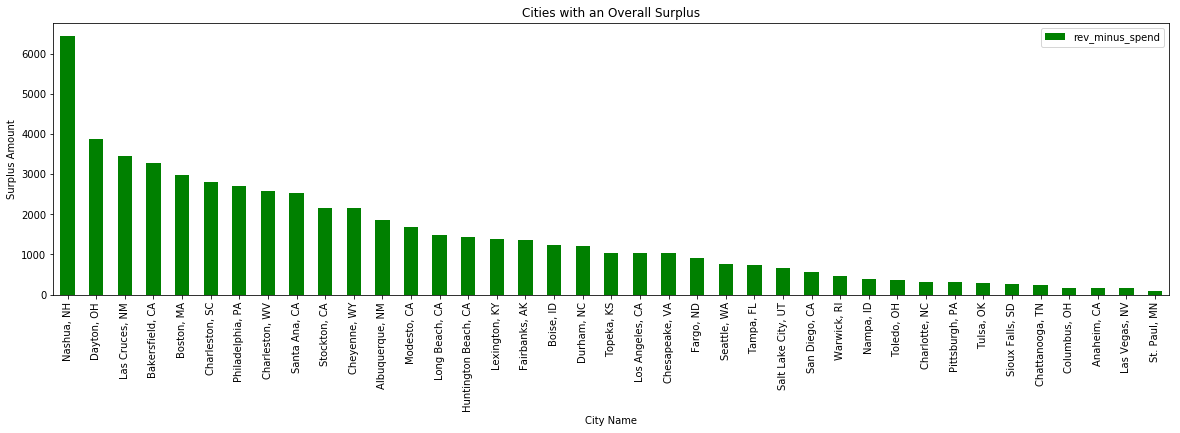

In [9]:
#Bar chart of cities that run a surplus
df_sum_surplus = df_sum_deficit_surplus[df_sum_deficit_surplus.rev_minus_spend >= 0]
df_sum_surplus['city_state'] = df_sum_surplus['city_name'] + ', ' + df_sum_surplus['state']
df_sum_surplus = df_sum_surplus.sort_values(by = 'rev_minus_spend', ascending = False)

df_sum_surplus.plot(kind='bar', x = 'city_state', y = 'rev_minus_spend', color = 'green', figsize = (20,5))
plt.title('Cities with an Overall Surplus')
plt.xlabel('City Name')
plt.ylabel('Surplus Amount')
plt.show()

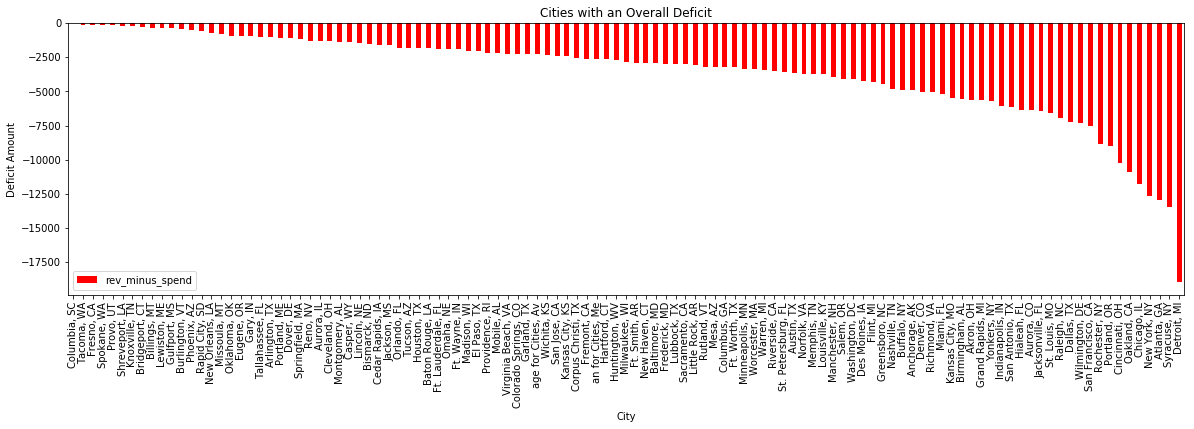

In [10]:
#Bar chart of cities that run an overall deficit
df_sum_deficit = df_sum_deficit_surplus[df_sum_deficit_surplus.rev_minus_spend < 0]
df_sum_deficit['city_state'] = df_sum_deficit['city_name'] + ', ' + df_sum_deficit['state']
df_sum_deficit = df_sum_deficit.sort_values(by = 'rev_minus_spend', ascending = False)

df_sum_deficit.plot(kind = 'bar', x = 'city_state', y = 'rev_minus_spend', color = 'red', figsize = (20,5))
plt.title('Cities with an Overall Deficit')
plt.xlabel('City')
plt.ylabel('Deficit Amount')
plt.show()

<div class="span5 alert alert-info">
<B>  Metric 2: </B> <a class="anchor" id="metric2"></a> 
 
</div>

<div class="span5 alert alert-success">
<I> Metric 2: assess if annual remaining balance (deficit or surplus), after adjusting for inflation, is increasing, stable, or decreasing </I>
</div>

In [11]:
#Calculate each city's annual remaining balance (deficit or surplus)
df_rev_and_spend = data_in[['city_name','state','year','rev_total','spending_total']]

#df_rev_and_spend = df_rev_and_spend.loc[df_rev_and_spend.city_name == 'Detroit']

df_rev_and_spend['remaining_balance'] = df_rev_and_spend.rev_total - df_rev_and_spend.spending_total

df_rev_and_spend['city_state'] = df_rev_and_spend.city_name + '_' + df_rev_and_spend.state
df_rev_and_spend = df_rev_and_spend.drop(['city_name', 'state'],axis = 'columns')

df_rev_and_spend.sample()

,year,rev_total,spending_total,remaining_balance,city_state
1822,2009,9695.44,10805.7,-1110.26,Chattanooga_TN


In [12]:
#Convert each year's rem_bal_/surplus from rows to columns
df_rem_bal = df_rev_and_spend[['city_state','year','remaining_balance']]

df_rem_bal = df_rem_bal.pivot_table(index = ['city_state'],
                                        columns = ['year'],
                                        aggfunc='sum')


new_column_names = ['rem_bal_2002','rem_bal_2003','rem_bal_2004','rem_bal_2005','rem_bal_2006','rem_bal_2007','rem_bal_2008',
                    'rem_bal_2009','rem_bal_2010','rem_bal_2011','rem_bal_2012','rem_bal_2013','rem_bal_2014','rem_bal_2015',
                    'rem_bal_2016']

df_rem_bal.columns = new_column_names

df_rem_bal.sample()

,rem_bal_2002,rem_bal_2003,rem_bal_2004,rem_bal_2005,rem_bal_2006,rem_bal_2007,rem_bal_2008,rem_bal_2009,rem_bal_2010,rem_bal_2011,rem_bal_2012,rem_bal_2013,rem_bal_2014,rem_bal_2015,rem_bal_2016
city_state,,,,,,,,,,,,,,,
St. Paul_MN,-284.89,-183.06,812.8,237.19,278.34,560.88,-529.65,-1270.6,65.66,-41.73,-434.39,-166.03,719.65,101.05,224.26


In [13]:
#Create a dataframe showing each city's annual percent change in remaining balance
def percent_change(row):
    
    row['2003'] = (row['rem_bal_2003'] - row['rem_bal_2002'])/row['rem_bal_2002']
    row['2004'] = (row['rem_bal_2004'] - row['rem_bal_2003'])/row['rem_bal_2003']
    row['2005'] = (row['rem_bal_2005'] - row['rem_bal_2004'])/row['rem_bal_2004']
    row['2006'] = (row['rem_bal_2006'] - row['rem_bal_2005'])/row['rem_bal_2005']
    row['2007'] = (row['rem_bal_2007'] - row['rem_bal_2006'])/row['rem_bal_2006']
    row['2008'] = (row['rem_bal_2008'] - row['rem_bal_2007'])/row['rem_bal_2007']
    row['2009'] = (row['rem_bal_2009'] - row['rem_bal_2008'])/row['rem_bal_2008']
    row['2010'] = (row['rem_bal_2010'] - row['rem_bal_2009'])/row['rem_bal_2009']
    row['2011'] = (row['rem_bal_2011'] - row['rem_bal_2010'])/row['rem_bal_2010']
    row['2012'] = (row['rem_bal_2012'] - row['rem_bal_2011'])/row['rem_bal_2011']
    row['2013'] = (row['rem_bal_2013'] - row['rem_bal_2012'])/row['rem_bal_2012']
    row['2014'] = (row['rem_bal_2014'] - row['rem_bal_2013'])/row['rem_bal_2013']
    row['2015'] = (row['rem_bal_2015'] - row['rem_bal_2014'])/row['rem_bal_2014']
    row['2016'] = (row['rem_bal_2016'] - row['rem_bal_2015'])/row['rem_bal_2015']
   
    return row
    
df_rem_bal_percent = df_rem_bal.apply(percent_change, axis='columns')

df_rem_bal_percent = df_rem_bal_percent.loc[:,'2003':]

In [14]:
#Convert each year's rem_bal_percent from rows to columns
df_rem_bal_percent_transpose = df_rem_bal_percent.T

df_rem_bal_percent_transpose = df_rem_bal_percent_transpose.reset_index()

df_rem_bal_percent_transpose = df_rem_bal_percent_transpose.rename(columns = {'index':'year'})

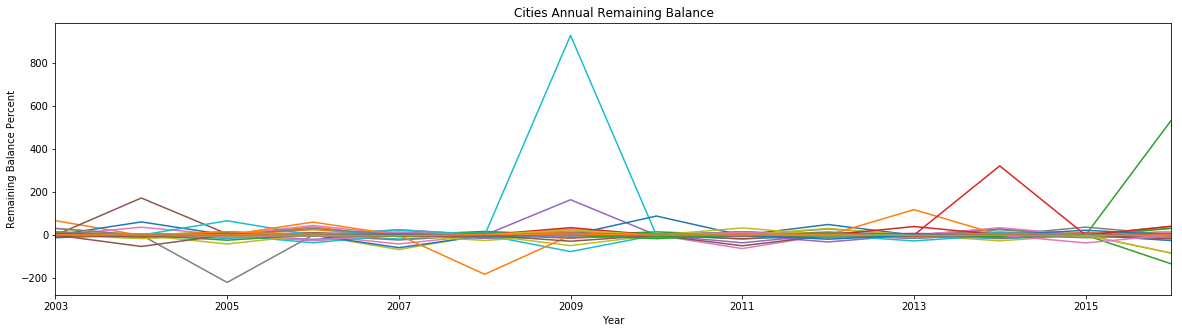

In [15]:
#Chart of all cities remaining balance percent
df_rem_bal_percent_transpose.plot(kind = 'line', x = 'year', figsize = (20,5), legend = False)
plt.title('Cities Annual Remaining Balance')
plt.xlabel('Year')
plt.ylabel('Remaining Balance Percent')
plt.show()

In [16]:
#Add a column to identify which have years that are outliers (-50% < Remaining Balance Percent < 50%)
def identify_outliers(row):
    city_cols_count = len(row.iloc[3:])
    i = 3
    
    while i <= city_cols_count:
        if (row[i] > 50) | (row[i] < -50):
            row['outlier'] = 1
            break
        else:
            row['outlier'] = 0
        
        i += 1
        
    return row

df_rem_bal_percent = df_rem_bal_percent.apply(identify_outliers, axis = 'columns')

In [17]:
#Transpose outlier dataframe to use to create chart of cities with outliers (-50% < rem_bal_percent < 50%)
df_rem_bal_percent_outlier = df_rem_bal_percent[df_rem_bal_percent.outlier == True]

df_rem_bal_percent_outlier = df_rem_bal_percent_outlier.drop('outlier', axis = 'columns')

df_rem_bal_percent_outlier_transpose = df_rem_bal_percent_outlier.T

df_rem_bal_percent_outlier_transpose = df_rem_bal_percent_outlier_transpose.reset_index()

df_rem_bal_percent_outlier_transpose = df_rem_bal_percent_outlier_transpose.rename(columns = {'index':'year'})

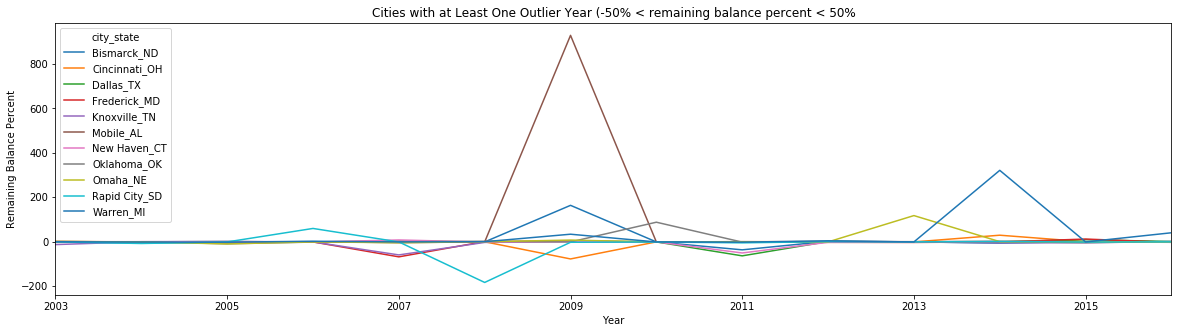

In [18]:
#Chart of cities that have at least one outlier year (-50% < remaining balance percent < 50%)
df_rem_bal_percent_outlier_transpose.plot(kind = 'line', x = 'year', figsize = (20,5))
plt.title('Cities with at Least One Outlier Year (-50% < remaining balance percent < 50%')
plt.xlabel('Year')
plt.ylabel('Remaining Balance Percent')
plt.show()

In [19]:
df_rem_bal_percent_transpose

city_state,year,Akron_OH,Albuquerque_NM,Anaheim_CA,Anchorage_AK,Arlington_TX,Atlanta_GA,Aurora_CO,Aurora_IL,Austin_TX,Bakersfield_CA,Baltimore_MD,Baton Rouge_LA,Billings_MT,Birmingham_AL,Bismarck_ND,Boise_ID,Boston_MA,Bridgeport_CT,Buffalo_NY,Burlington_VT,Casper_WY,Cedar Rapids_IA,Charleston_SC,Charleston_WV,Charlotte_NC,Chattanooga_TN,Chesapeake_VA,Cheyenne_WY,Chicago_IL,Cincinnati_OH,Cleveland_OH,Colorado Springs_CO,Columbia_SC,Columbus_GA,Columbus_OH,Corpus Christi_TX,Dallas_TX,Dayton_OH,Denver_CO,Des Moines_IA,Detroit_MI,Dover_DE,Durham_NC,El Paso_TX,Eugene_OR,Fairbanks_AK,Fargo_ND,Flint_MI,Frederick_MD,Fremont_CA,Fresno_CA,Ft. Lauderdale_FL,Ft. Smith_AR,Ft. Wayne_IN,Ft. Worth_TX,Garland_TX,Gary_IN,Grand Rapids_MI,Greensboro_NC,Gulfport_MS,Hartford_CT,Hialeah_FL,Houston_TX,Huntington Beach_CA,Huntington_WV,Indianapolis_IN,Jackson_MS,Jacksonville_FL,Kansas City_KS,Kansas City_MO,Knoxville_TN,Las Cruces_NM,Las Vegas_NV,Lewiston_ME,Lexington_KY,Lincoln_NE,Little Rock_AR,Long Beach_CA,Los Angeles_CA,Louisville_KY,Lubbock_TX,Madison_WI,Manchester_NH,Memphis_TN,Mesa_AZ,Miami_FL,Milwaukee_WI,Minneapolis_MN,Missoula_MT,Mobile_AL,Modesto_CA,Montgomery_AL,Nampa_ID,Nashua_NH,Nashville_TN,New Haven_CT,New Orleans_LA,New York_NY,Norfolk_VA,Oakland_CA,Oklahoma_OK,Omaha_NE,Orlando_FL,Philadelphia_PA,Phoenix_AZ,Pittsburgh_PA,Portland_ME,Portland_OR,Providence_RI,Provo_UT,Raleigh_NC,Rapid City_SD,Reno_NV,Richmond_VA,Riverside_CA,Rochester_NY,Rutland_VT,Sacramento_CA,Salem_OR,Salt Lake City_UT,San Antonio_TX,San Diego_CA,San Francisco_CA,San Jose_CA,Santa Ana_CA,Seattle_WA,Shreveport_LA,Sioux Falls_SD,Spokane_WA,Springfield_MA,St. Louis_MO,St. Paul_MN,St. Petersburg_FL,Stockton_CA,Syracuse_NY,Tacoma_WA,Tallahassee_FL,Tampa_FL,Toledo_OH,Topeka_KS,Tucson_AZ,Tulsa_OK,Virginia Beach_VA,Warren_MI,Warwick_RI,Washington_DC,Wichita_KS,Wilmington_DE,Worcester_MA,Yonkers_NY,age for Cities_Av,an for Cities_Me
0,2003,-0.333788,-0.120180,-2.454543,-0.566653,0.046602,2.012001,0.192843,-0.427600,0.461899,-0.750931,-1.911739,66.246537,0.886027,-0.209049,-1.730244,1.838738,2.057995,-3.054655,1.469572,-0.206304,-0.633792,-1.019349,2.046853,0.204783,-1.489474,-0.551901,-1.683548,-0.411465,-0.297316,1.244199,0.953982,0.464199,-3.045674,-0.284448,1.486981,-0.779531,0.152070,-0.184012,0.290117,-0.383953,0.534080,-4.518729,4.353160,-0.273014,3.656863,-0.697029,-2.499164,-0.607812,-2.696308,0.587155,-1.028075,-0.192614,0.779681,0.239710,-0.340900,-1.003047,0.450705,-0.259372,0.070366,1.484710,4.244028,0.315335,-0.629945,-4.243892,-2.170398,1.710715,-1.075556,1.069405,0.768204,1.999915,-12.999549,-0.079027,-0.181860,-2.071528,-0.502626,0.847155,-2.333987,-0.518811,-0.851785,-0.055531,3.375032,-0.833090,0.837987,0.049322,-0.742269,-0.849923,0.205196,-0.828683,29.949749,0.301612,-1.451645,12.491817,8.668648,3.201280,-0.008301,-0.582172,-2.140953,-0.244804,-0.974188,-0.291794,0.451907,0.330492,0.426289,-0.805447,-1.829326,0.080331,-0.814656,0.100392,1.502128,-0.397177,-0.037839,-0.725086,0.209841,0.515987,2.867082,-0.803869,-0.446796,14.681356,-0.056111,-0.059815,0.329297,-0.557073,-0.459403,0.119583,-2.103557,-0.038513,-0.147335,30.131279,-0.172994,-0.492685,-0.113622,-0.357436,-0.094080,-3.052632,0.088245,-1.153373,-1.236683,-0.622090,-1.062293,0.520972,4.106741,-0.911466,0.042915,-0.372409,0.759413,-0.968792,-0.076354,-0.325005,-0.309740,0.921223,-0.038863,0.479858
1,2004,-0.005166,4.284316,-1.312402,-0.225557,-2.893459,-0.550702,-0.248005,3.199977,-1.242319,2.954231,-0.469251,-2.555940,-0.718187,-0.493820,-6.010414,-1.060142,-1.247968,-0.584677,-0.010961,-1.040486,-0.611559,-5.361290,-3.966229,0.419908,-2.912983,4.959512,0.799618,-1.014008,-1.679504,-1.166355,1.643210,0.091123,2.203460,0.471496,-0.914247,-3.883504,-0.560509,-1.137584,-0.678665,0.284337,-0.228858,-0.068168,3.283333,-0.456663,-0.439929,-3.727308,-0.264889,-2.347349,-0.157713,-1.559724,60.455357,-0.523777,0.922645,0.400115,-1.160262,171.745098,-0.301790,-0.896687,0.086775,0.786070,0.316224,-0.724286

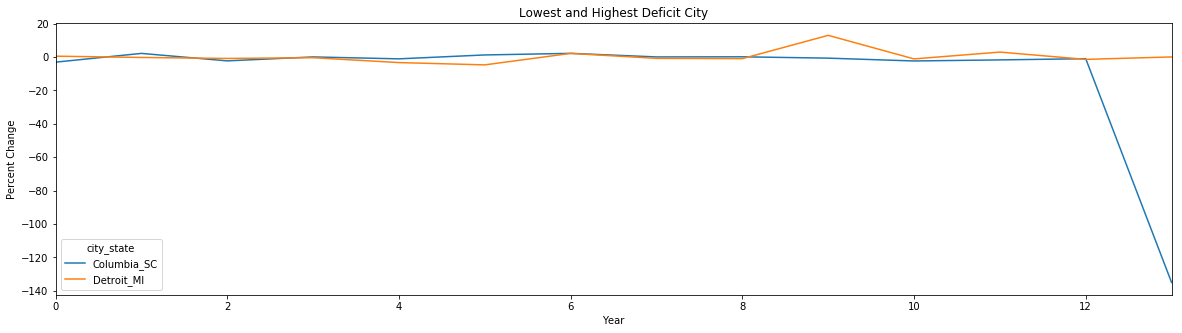

In [20]:
#Get lowest and highest deficit city
df_lowest_and_highest_deficit_city = df_rem_bal_percent_transpose[['Columbia_SC','Detroit_MI']]

#Chart of lowest and highest deficit city
df_lowest_and_highest_deficit_city.plot(kind = 'line', figsize = (20,5))
plt.title('Lowest and Highest Deficit City')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.show()

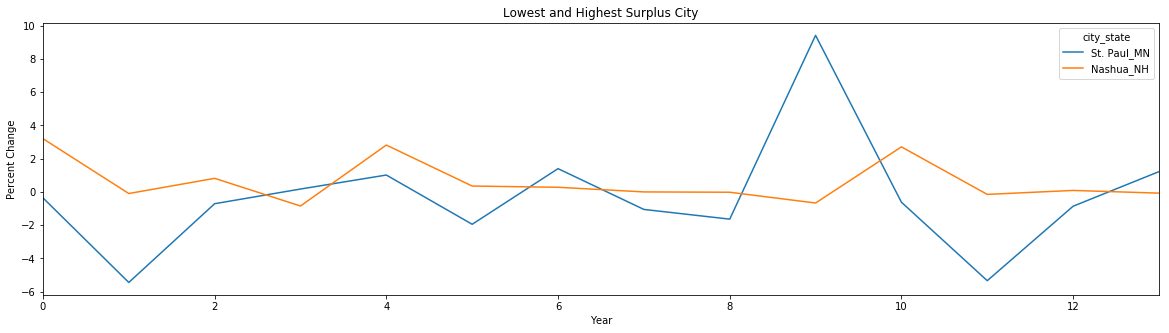

In [21]:
#df of lowest and highest surplus city
df_lowest_and_highest_surplus_city = df_rem_bal_percent_transpose[['St. Paul_MN','Nashua_NH']]

#Plot the lowest and highest surplus cities percent_change per year
df_lowest_and_highest_surplus_city.plot(kind = 'line', figsize = (20,5))
plt.title('Lowest and Highest Surplus City')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.show()

<div class="span5 alert alert-info">
<B>  Metric 3: </B> <a class="anchor" id="metric1"></a> 
 
</div>

<div class="span5 alert alert-success">
<I> Metric 3: of the cities included, which states have the highest percent of fiscally responsible and not responsible  cities</I>
</div>

In [22]:
#dataframe sorted by state and "revenue - spend" amount (dataframe is from metric 1 above)
df_deficit_surplus_cities = df_sum_deficit_surplus

df_deficit_surplus_cities = df_deficit_surplus_cities.sort_values(['state', 'rev_minus_spend'], ascending = True)

In [23]:
#categorize each city as a surplus or deficit city
def city_def_or_surplus(row):
    def_or_sur = ''
    
    if row['rev_minus_spend'] > 0:
        def_or_sur = 'surplus'
    else:
        def_or_sur = 'deficit'
    
    return def_or_sur
        

df_deficit_surplus_cities['deficit_or_surplus'] = df_deficit_surplus_cities.apply(city_def_or_surplus, axis = 'columns')

In [24]:
#count by state the number of deficit and surplus cities
df_deficit_surplus_states = df_deficit_surplus_cities.drop(['grand_total_rev','grand_total_spending','rev_minus_spend'], axis = 'columns')
df_deficit_surplus_states = df_deficit_surplus_states.groupby(['state','deficit_or_surplus']).count()

df_deficit_surplus_states = df_deficit_surplus_states.reset_index()

df_deficit_surplus_states = df_deficit_surplus_states.rename(columns = {'city_name':'count'})

In [25]:
#Create dataframe with each states deficit and surplus info on one row, instead of multiple rows
df_state_deficit_cities = df_deficit_surplus_states[df_deficit_surplus_states['deficit_or_surplus'] == 'deficit']
df_state_surplus_cities = df_deficit_surplus_states[df_deficit_surplus_states['deficit_or_surplus'] == 'surplus']

df_deficit_surplus_states2 = df_state_deficit_cities.merge(df_state_surplus_cities, on = 'state', how = 'outer')
df_deficit_surplus_states2 = df_deficit_surplus_states2.drop(['deficit_or_surplus_x','deficit_or_surplus_y'], axis = 'columns')

df_deficit_surplus_states2.columns = ['state','deficit_cities_count','surplus_cities_count']

df_deficit_surplus_states2 = df_deficit_surplus_states2.fillna(0)

In [26]:
#Calculate each states percent of cities with surplus and cities with deficit
df_deficit_surplus_states2['total_cities'] = df_deficit_surplus_states2['deficit_cities_count'] + df_deficit_surplus_states2['surplus_cities_count']
df_deficit_surplus_states2['deficit_cities_percent'] = df_deficit_surplus_states2['deficit_cities_count']/df_deficit_surplus_states2['total_cities']
df_deficit_surplus_states2['surplus_cities_percent'] = df_deficit_surplus_states2['surplus_cities_count']/df_deficit_surplus_states2['total_cities']

In [27]:
#Sort from least to most responsible (sort is surplus percent, deficit percent, total cities)
df_deficit_surplus_states2 = df_deficit_surplus_states2.sort_values(['surplus_cities_percent','deficit_cities_percent','total_cities'], ascending = False)

df_deficit_surplus_states2.sample()

,state,deficit_cities_count,surplus_cities_count,total_cities,deficit_cities_percent,surplus_cities_percent
35,OR,3.0,0.0,3.0,1.0,0.0


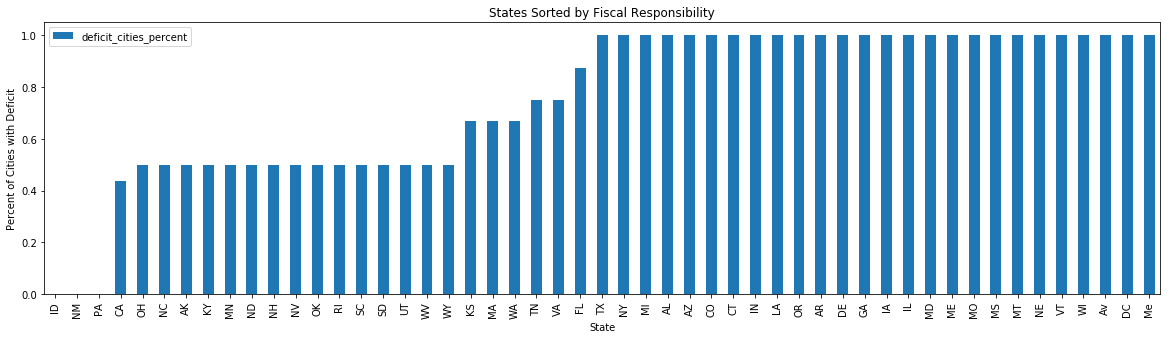

In [28]:
df_deficit_surplus_states2.plot(kind = 'bar', x = 'state', y = 'deficit_cities_percent', figsize = (20,5))
plt.title('States Sorted by Fiscal Responsibility')
plt.xlabel('State')
plt.ylabel('Percent of Cities with Deficit')
plt.show()

<div class="span5 alert alert-info">
<B>  Output file: </B> <a class="anchor" id="outfile"></a> 
 
</div>

<div class="span5 alert alert-success">
<I> Output a file of each city with the data calculated in this notebook </I>
</div>

In [29]:
df_city_summary = df_rem_bal.merge(df_rem_bal_percent, on = 'city_state')
df_city_summary.sample()

,rem_bal_2002,rem_bal_2003,rem_bal_2004,rem_bal_2005,rem_bal_2006,rem_bal_2007,rem_bal_2008,rem_bal_2009,rem_bal_2010,rem_bal_2011,rem_bal_2012,rem_bal_2013,rem_bal_2014,rem_bal_2015,rem_bal_2016,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,outlier
city_state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ft. Lauderdale_FL,-763.65,-616.56,-293.62,114.62,359.45,274.99,439.3,-1609.17,-171.38,-57.64,-467.66,188.18,307.99,224.37,192.81,-0.192614,-0.523777,-1.390369,2.136015,-0.23497,0.597513,-4.663032,-0.893498,-0.663671,7.113463,-1.402386,0.636678,-0.271502,-0.140661,0.0


In [30]:
#Prepare df_sum_deficit_surplus to be merged with df_city_summary
df_sum_deficit_surplus['city_state'] = df_sum_deficit_surplus['city_name'] + '_' + df_sum_deficit_surplus['state']
df_sum_deficit_surplus = df_sum_deficit_surplus.set_index('city_state')

In [31]:
#Add a column that identifies a city as (1) went bankrupt (or close to bankrupt), (2) deficit, or (3) surplus
def money_mgmt(row):
    bankrupt_cities_list = ['Detroit','Stockton','Providence','Oakland','Hartford']
    
    out_value = 0
    if (row.city_name == 'Detroit' or row.city_name == 'Stockton' or row.city_name == 'Providence' 
        or row.city_name == 'Oakland' or row.city_name == 'Hartford'):
        out_value = 1
    elif row.rev_minus_spend < 0:
        out_value = 2
    else:
        out_value = 3
        
    return out_value
    
df_sum_deficit_surplus['money_mgmt'] = df_sum_deficit_surplus.apply(money_mgmt, axis = 'columns')
df_sum_deficit_surplus.sample()

,city_name,state,grand_total_rev,grand_total_spending,rev_minus_spend,money_mgmt
city_state,,,,,,
Colorado Springs_CO,Colorado Springs,CO,101251.78,103484.57,-2232.79,2


In [32]:
#Merge the revenue summary data frame with df_city_summary to produce a dataframe summary of remaining balances per year,
#percent change per year, and summary of rem_balance change
df_city_summary = df_city_summary.merge(df_sum_deficit_surplus, on = 'city_state' )
df_city_summary.sample()

,rem_bal_2002,rem_bal_2003,rem_bal_2004,rem_bal_2005,rem_bal_2006,rem_bal_2007,rem_bal_2008,rem_bal_2009,rem_bal_2010,rem_bal_2011,rem_bal_2012,rem_bal_2013,rem_bal_2014,rem_bal_2015,rem_bal_2016,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,outlier,city_name,state,grand_total_rev,grand_total_spending,rev_minus_spend,money_mgmt
city_state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
St. Paul_MN,-284.89,-183.06,812.8,237.19,278.34,560.88,-529.65,-1270.6,65.66,-41.73,-434.39,-166.03,719.65,101.05,224.26,-0.357436,-5.440074,-0.708182,0.17349,1.015089,-1.94432,1.398943,-1.051676,-1.635547,9.409538,-0.617786,-5.334458,-0.859585,1.219297,0.0,St. Paul,MN,95267.49,95178.01,89.48,3


In [33]:
df_city_summary2 = df_city_summary[['grand_total_rev', 'grand_total_spending', 'rev_minus_spend',
       'rem_bal_2002', 'rem_bal_2003', 'rem_bal_2004', 'rem_bal_2005',
       'rem_bal_2006', 'rem_bal_2007', 'rem_bal_2008', 'rem_bal_2009',
       'rem_bal_2010', 'rem_bal_2011', 'rem_bal_2012', 'rem_bal_2013',
       'rem_bal_2014', 'rem_bal_2015', 'rem_bal_2016', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016','outlier','money_mgmt']]

df_city_summary2 = df_city_summary2.rename(columns = {'2003':'2003_percent_change', '2004':'2004_percent_change',
         '2005':'2005_percent_change','2006':'2006_percent_change', '2007':'2007_percent_change','2008':'2008_percent_change',
         '2009':'2009_percent_change','2010':'2010_percent_change', '2011':'2011_percent_change','2012':'2012_percent_change',
         '2013':'2013_percent_change','2014':'2014_percent_change', '2015':'2015_percent_change','2016':'2016_percent_change'})

df_city_summary2.sample()

,grand_total_rev,grand_total_spending,rev_minus_spend,rem_bal_2002,rem_bal_2003,rem_bal_2004,rem_bal_2005,rem_bal_2006,rem_bal_2007,rem_bal_2008,rem_bal_2009,rem_bal_2010,rem_bal_2011,rem_bal_2012,rem_bal_2013,rem_bal_2014,rem_bal_2015,rem_bal_2016,2003_percent_change,2004_percent_change,2005_percent_change,2006_percent_change,2007_percent_change,2008_percent_change,2009_percent_change,2010_percent_change,2011_percent_change,2012_percent_change,2013_percent_change,2014_percent_change,2015_percent_change,2016_percent_change,outlier,money_mgmt
city_state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Portland_ME,84142.91,85196.9,-1053.99,-327.23,-60.65,66.98,-6.95,168.74,131.01,921.45,206.25,-358.88,-660.32,-175.96,-18.28,-626.38,42.17,-355.94,-0.814656,-2.104369,-1.103762,-25.279137,-0.223598,6.033433,-0.776168,-2.740024,0.839947,-0.733523,-0.896113,33.265864,-1.067323,-9.440598,0.0,2


In [34]:
out_csv = '03_cities_summary.csv'

df_city_summary2.to_csv(out_csv)